In [9]:
!pip install -r ../requirements.txt

In [1]:
import numpy as np

In [2]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, momentum=0.9, n_iters=1000):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.velocity_w = None
        self.velocity_b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        self.velocity_w = np.zeros(n_features)
        self.velocity_b = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.velocity_w = self.momentum * self.velocity_w - self.learning_rate * dw
            self.velocity_b = self.momentum * self.velocity_b - self.learning_rate * db

            self.weights += self.velocity_w
            self.bias += self.velocity_b

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [3]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X.squeeze() + np.random.randn(100)  # y = 4 + 3x + Gaussian noise

y = y.reshape(-1)

In [4]:
from sklearn.model_selection import train_test_split

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegressionGD(learning_rate=0.1, momentum=0.9, n_iters=1000)
model.fit(X_train, y_train)

In [6]:
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.6537


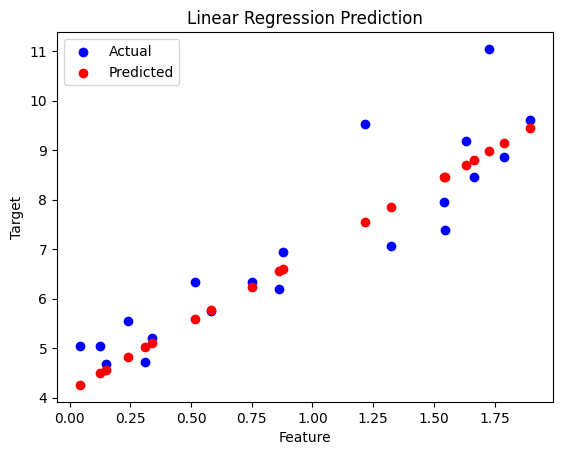

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()
